In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage

In [1]:
def fib_recursive(n):
    if n <=1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# Time Complexity: O(2^n)
# Space Complexity: O(n) – due to recursion stack

def fib_dp(n):
    if n<=1:
        return n
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[i-1] + dp[i-2])
    return dp[n]

# Time Complexity: O(n)
# Space Complexity: O(n) – uses a list to store all results

In [6]:
print("Fibonacci Recursive (n=10):", fib_recursive(10))
print("Fibonacci DP (n=10):", fib_dp(10))

Fibonacci Recursive (n=10): 55
Fibonacci DP (n=10): 55


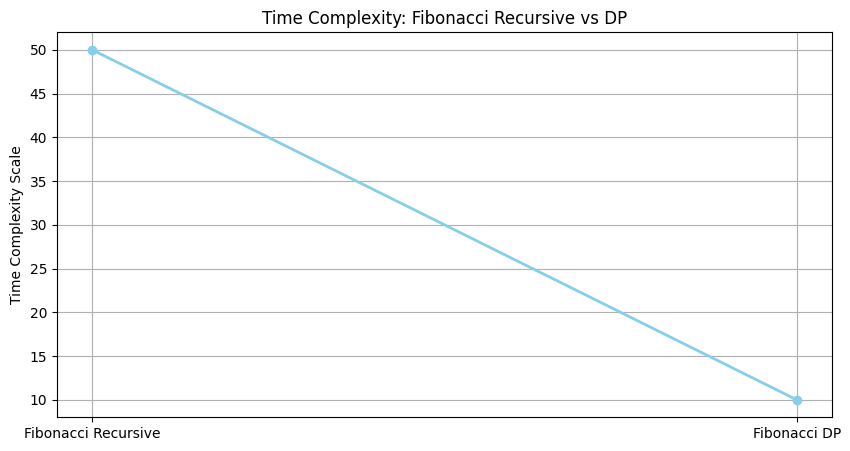

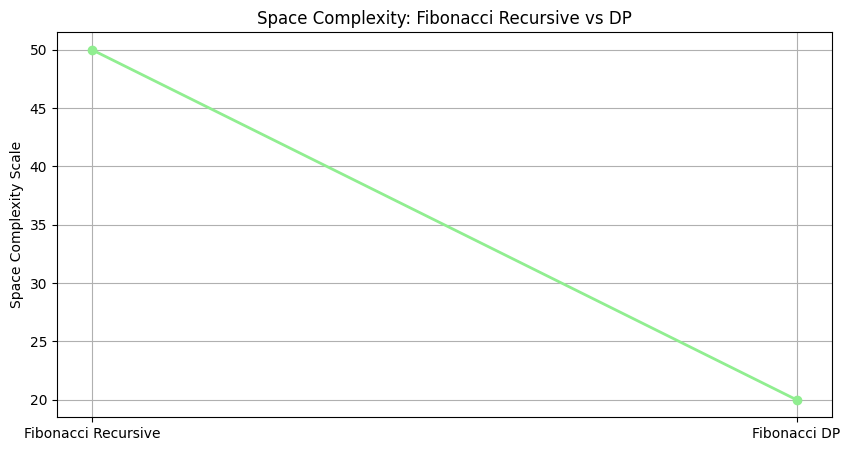

In [5]:
# Fibonacci Recursive vs Fibonacci DP
fib_algorithms = ["Fibonacci Recursive", "Fibonacci DP"]
time_values = [50, 10]   # symbolic time complexity scale
space_values = [50, 20]  # symbolic space complexity scale

# Line graph for Time Complexity
plt.figure(figsize=(10,5))
plt.plot(fib_algorithms, time_values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.ylabel("Time Complexity Scale")
plt.title("Time Complexity: Fibonacci Recursive vs DP")
plt.grid(True)
plt.show()

# Line graph for Space Complexity
plt.figure(figsize=(10,5))
plt.plot(fib_algorithms, space_values, marker='o', color='lightgreen', linestyle='-', linewidth=2)
plt.ylabel("Space Complexity Scale")
plt.title("Space Complexity: Fibonacci Recursive vs DP")
plt.grid(True)
plt.show()

In [2]:
def merge_sort(arr):
    if len(arr) <=1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

        result.extend(left[i:])
        result.extend(right[j:])
        return result
    
# Time Complexity: O(n log n)
# Space Complexity: O(n) 

In [28]:
arr = [64,25,12,22,11]
print("Merge Sort:", merge_sort(arr.copy()))

Merge Sort: [11, 25, 64, 12, 22]


In [23]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Time Complexity:
#   - Best & Average Case: O(n log n)
#   - Worst Case: O(n^2) 
# # Space Complexity: O(n)


In [27]:
arr = [84,28,13,23,12]
print("Quick Sort:", quick_sort(arr.copy()))

Quick Sort: [12, 13, 23, 28, 84]


In [29]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
            arr[j+1] = key
        return arr
        
#Time Complexity:
#Best Case: O(n)
#Worst Case: O(n²)
#Average Case: O(n²)

#Space Complexity: O(1)

In [30]:
arr = [77,23,15,16,19]
print("Insertion Sort:", insertion_sort(arr.copy()))

Insertion Sort: [23, 77, 15, 16, 19]


In [31]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1],arr[j]
        return arr
    
#Time Complexity:
#Best Case: O(n)
#Worst Case: O(n²)
#Average Case: O(n²)
#Space Complexity:O(1)

In [32]:
arr = [78,26,16,19,20]
print("Bubble_Sort:", bubble_sort(arr.copy()))

Bubble_Sort: [26, 16, 19, 20, 78]


In [35]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
               min_idx = j
        arr[i], arr[min_idx] - arr[min_idx], arr[j]
        return arr
    
#Time Complexity:
#Best Case:O(n²)
#Worst Case: O(n²)
#Average Case: O(n²)
#Space Complexity:O(1)

In [38]:
arr = [79,27,17,20,21]
print("Selection_Sort:", selection_sort(arr.copy()))

Selection_Sort: [79, 27, 17, 20, 21]


In [39]:
def binary_search(arr, target):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

#Time Complexity:O(log n)
#Space Complexity:O(1)

In [41]:
arr = [80,28,18,22,24]
print ("Search 18:", binary_search(arr, 18))

Search 18: 2


In [42]:
def measure_time(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

def measure_memory(func, *args):
    mem = memory_usage((func, args), max_iterations=1)
    return max(mem) - min(mem)

In [45]:
measure_time(merge_sort, [4,2,3,6,5])

1.1920928955078125e-05

In [46]:
measure_memory(merge_sort, [4,2,3,6,5])

0.015625

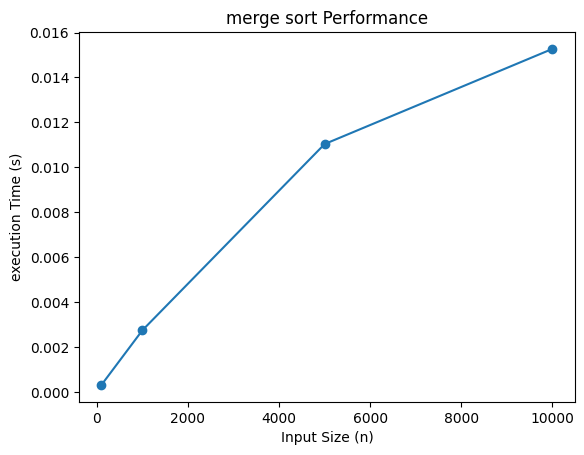

Input Sizes: [100, 1000, 5000, 10000]
Execution Times (s): [0.0003058910369873047, 0.0027420520782470703, 0.01103520393371582, 0.015272855758666992]


In [47]:
sizes = [100, 1000, 5000, 10000]
times = []
for n in sizes:
    arr = np.random.randint(0, 10000, n).tolist()
    t = measure_time(merge_sort, arr)
    times.append(t)

plt.plot(sizes, times, marker='o')
plt.xlabel("Input Size (n)")
plt.ylabel("execution Time (s)")
plt.title("merge sort Performance")
plt.show()

print("Input Sizes:", sizes)
print("Execution Times (s):", times)

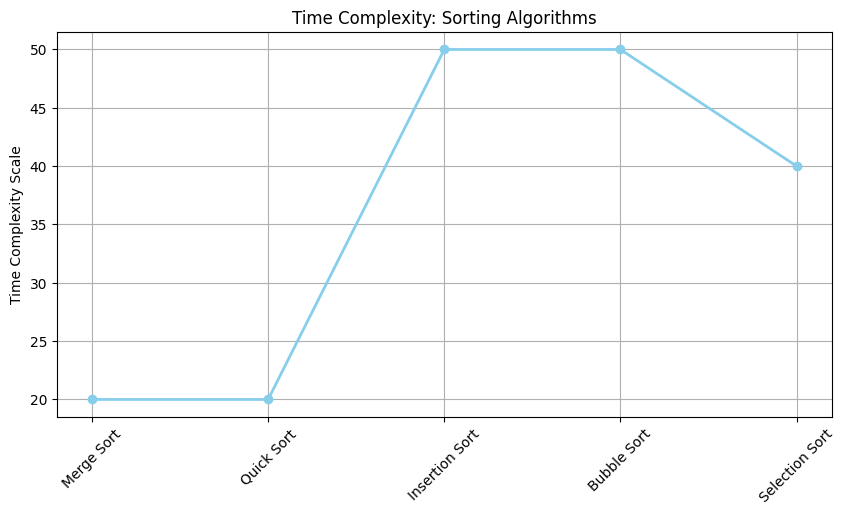

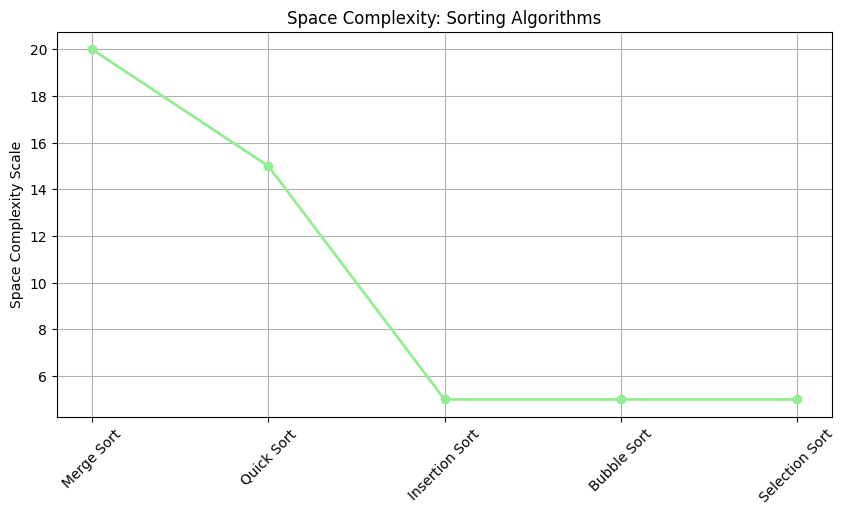

In [4]:
import matplotlib.pyplot as plt

# Sorting Algorithms Comparison
sort_algorithms = ["Merge Sort", "Quick Sort", "Insertion Sort", "Bubble Sort", "Selection Sort"]
time_values = [20, 20, 50, 50, 40]   # symbolic values
space_values = [20, 15, 5, 5, 5]     # symbolic values

# Time Complexity
plt.figure(figsize=(10,5))
plt.plot(sort_algorithms, time_values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Time Complexity Scale")
plt.title("Time Complexity: Sorting Algorithms")
plt.grid(True)
plt.show()

# Space Complexity
plt.figure(figsize=(10,5))
plt.plot(sort_algorithms, space_values, marker='o', color='lightgreen', linestyle='-', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Space Complexity Scale")
plt.title("Space Complexity: Sorting Algorithms")
plt.grid(True)
plt.show()


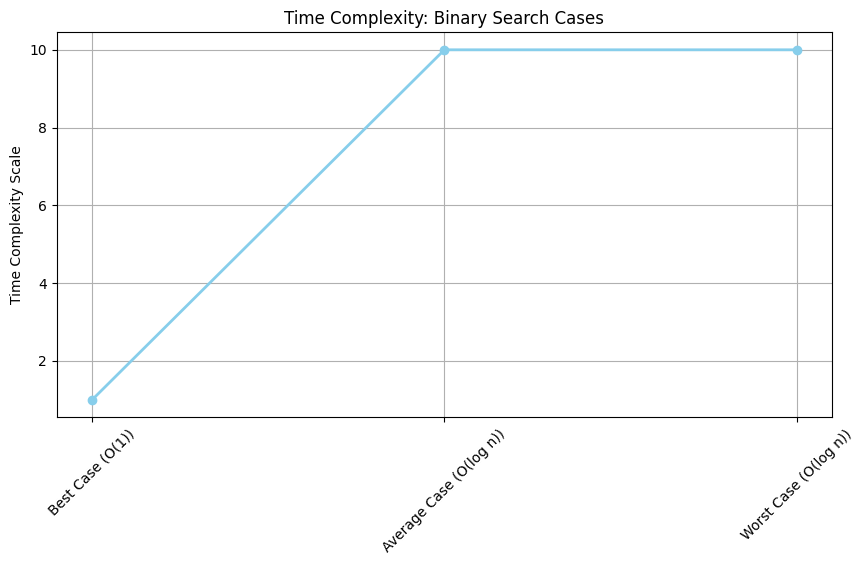

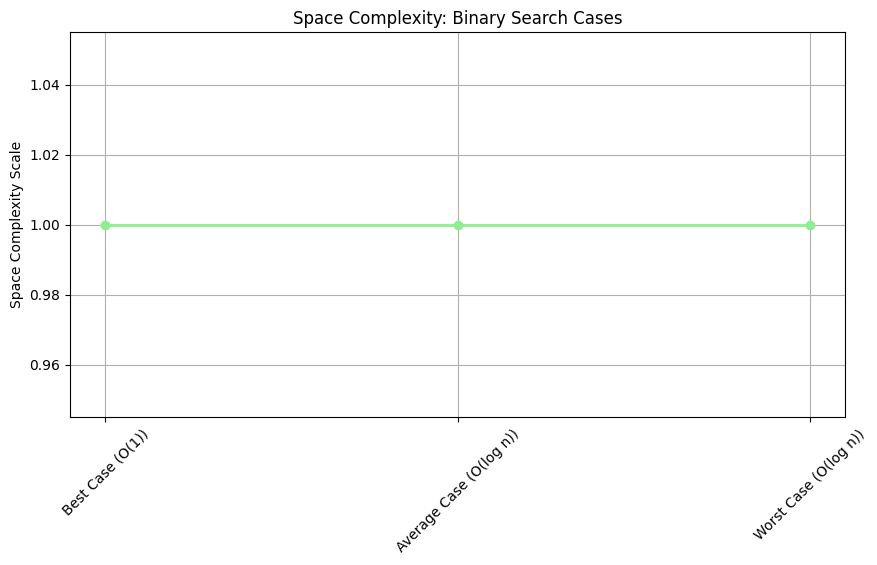

In [5]:
import matplotlib.pyplot as plt

# Binary Search Comparisons
binary_cases = ["Best Case (O(1))", "Average Case (O(log n))", "Worst Case (O(log n))"]
time_values = [1, 10, 10]   
space_values = [1, 1, 1]    

# Line graph for Time Complexity
plt.figure(figsize=(10,5))
plt.plot(binary_cases, time_values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Time Complexity Scale")
plt.title("Time Complexity: Binary Search Cases")
plt.grid(True)
plt.show()

# Line graph for Space Complexity
plt.figure(figsize=(10,5))
plt.plot(binary_cases, space_values, marker='o', color='lightgreen', linestyle='-', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Space Complexity Scale")
plt.title("Space Complexity: Binary Search Cases")
plt.grid(True)
plt.show()

